<a href="https://colab.research.google.com/github/mar4ello-hash/mnist-deep-learning/blob/main/ML_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Task 3: Build your own Deep Learning network***

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Data preprocessing***

In [2]:
# AddNIST dataset
train_X = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/train_x.npy", allow_pickle=True)
train_y = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/train_y.npy", allow_pickle=True)

test_X = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/test_x.npy", allow_pickle=True)
test_y = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/test_y.npy", allow_pickle=True)

valid_X = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/valid_x.npy", allow_pickle=True)
valid_y = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/valid_y.npy", allow_pickle=True)

# True values
tr = test_y

# Classes
classes = list(set(test_y))

# image: 28x28, classes: 0-19
def process(x, y):

    p_x = np.moveaxis(x, 1, -1)
    p_y = tf.keras.utils.to_categorical(y, num_classes=20)

    print(p_x.shape, p_y.shape)

    return p_x, p_y

# AddNIST dataset preprocessing
train_X, train_y = process(train_X, train_y)
test_X, test_y = process(test_X, test_y)
valid_X, valid_y = process(valid_X, valid_y)

(45000, 28, 28, 3) (45000, 20)
(10000, 28, 28, 3) (10000, 20)
(15000, 28, 28, 3) (15000, 20)


### ***AddNIST Visualisation***

In [3]:
# Stephen's code

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_mnist_examples(x, y):

    # small adjustments
    x = np.moveaxis(x, -1, 0)

    fig = plt.figure(constrained_layout=True,figsize=(6,4), dpi=100)
    gs = fig.add_gridspec(3,4)
    main_ax = fig.add_subplot(gs[:3,:3])
    fig.suptitle(np.argmax(y))
    #main_ax.imshow(np.moveaxis(x, 0, -1))# .imshow(x)
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalization(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
    plt.show()

### ***Model building***

In [4]:
def build_model(x, y):
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(20, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()
        
    return model

In [5]:
model = build_model(train_X, train_y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 12, 12, 128)      5

### ***Model training***

In [6]:
history = model.fit(train_X, train_y, epochs=20, batch_size=128, validation_data=(valid_X, valid_y))

Epoch 1/20
352/352 [==============================] - 21s 23ms/step - loss: 2.1635 - accuracy: 0.2644 - val_loss: 4.0017 - val_accuracy: 0.0786
Epoch 2/20
352/352 [==============================] - 6s 18ms/step - loss: 1.5003 - accuracy: 0.4939 - val_loss: 1.4880 - val_accuracy: 0.5059
Epoch 3/20
352/352 [==============================] - 7s 18ms/step - loss: 0.9282 - accuracy: 0.7035 - val_loss: 1.1554 - val_accuracy: 0.6389
Epoch 4/20
352/352 [==============================] - 6s 18ms/step - loss: 0.5888 - accuracy: 0.8172 - val_loss: 0.8751 - val_accuracy: 0.7417
Epoch 5/20
352/352 [==============================] - 6s 18ms/step - loss: 0.4029 - accuracy: 0.8741 - val_loss: 0.5812 - val_accuracy: 0.8271
Epoch 6/20
352/352 [==============================] - 6s 18ms/step - loss: 0.2929 - accuracy: 0.9076 - val_loss: 0.6988 - val_accuracy: 0.7977
Epoch 7/20
352/352 [==============================] - 7s 19ms/step - loss: 0.2019 - accuracy: 0.9349 - val_loss: 0.6309 - val_accuracy: 0.825

In [7]:
print('Training History:\n')

for key in history.history.keys():
    print(key)

Training History:

loss
accuracy
val_loss
val_accuracy


### ***Metrics***

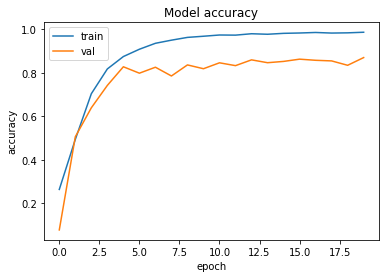

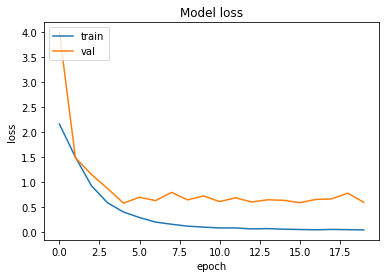

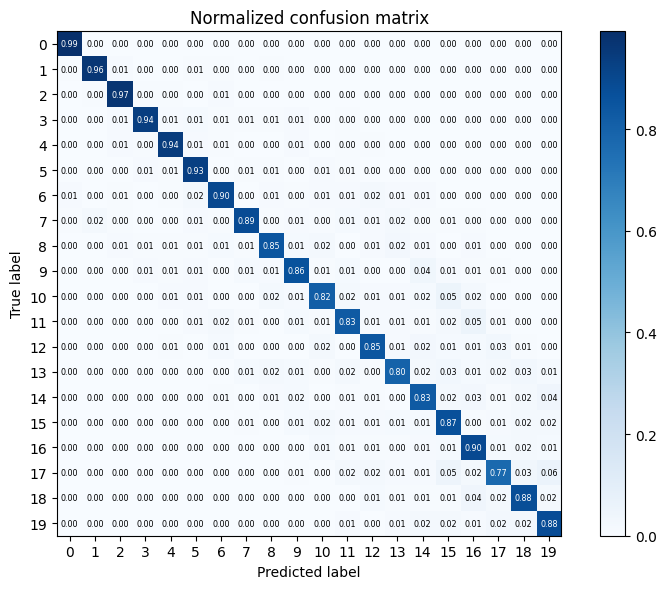

Accuracy: 0.8798999786376953
Loss: 0.5343687534332275
F1 score: 0.8799


In [8]:
# History for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print('===================================================')

# History for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print('===================================================')

# Predictions
prediction = model.predict(test_X)
pr = []
for i in range(prediction.shape[0]):
    pr.append(np.argmax(prediction[i]))

# to numpy array
pr = np.asarray(pr)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

conf_matrix = confusion_matrix(y_true=tr, y_pred=pr)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

fmt = '.2f'
thresh = conf_matrix.max() / 2.

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], fmt), ha='center', va='center',
                size='xx-small', color='white' if conf_matrix[i, j] > thresh else 'black')
 
ax.set(xticks=np.arange(conf_matrix.shape[1]),
    yticks=np.arange(conf_matrix.shape[0]),
    xticklabels=classes, yticklabels=classes,
    title='Normalized confusion matrix',
    ylabel='True label',
    xlabel='Predicted label')

fig.tight_layout()
plt.show()

score = model.evaluate(test_X, test_y, verbose=0)
print('===================================================')
print('Accuracy:', score[1])
print('Loss:', score[0])

from sklearn.metrics import f1_score

# F1 score 2*(precision*recall/precision+recall)
print("F1 score:", f1_score(tr, pr, average='micro'))


### ***Random prediction***

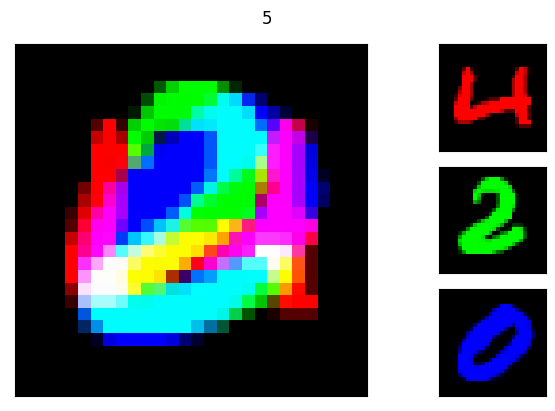

 Final prediction for your sample using MNIST Deep Learning model: 5


In [9]:
import random 
count = test_X.shape[0]

ri = random.randrange(count)

# Visualization
show_mnist_examples(test_X[ri], test_y[ri])

# Random Sample Prediction
print('================================================================\n',
      'Final prediction for your sample using MNIST Deep Learning model:', np.argmax(model.predict(np.array([test_X[ri]]))))